In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Five Steps Of Data Analysis
### 1 .Asking th right question to the data.
### 2. Data Preprocessing.
### 3. Exploratory Data Analysis (EDA).
### 4. Drawing Conclusions.
### 5. Communicating Results.

Performing EDA on titanic dataset

In [7]:
# importing the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# listing down the columns
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [9]:
# info method to see the advanced overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 63.0+ KB


In [10]:
# finding the missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# imputing or filling the missing values
df['age'].fillna(df['age'].mean(), inplace=True)

In [16]:
df['embarked'].fillna('S', inplace=True)

In [17]:
# analyzing the distribution of passangers
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [18]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [19]:
# Changing the datatype of the following cols
# 1.survived (category)
# 2. pclass (category)
# 3. sex(category)
# 4. age (int)
# 5. embarked (category)

In [20]:
df['survived']=df['survived'].astype('category')
df['pclass']=df['pclass'].astype('category')
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('int')
df['embarked']=df['embarked'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          891 non-null    int32   
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(6), float64(1), int32(1), int64(2), object(3)
memory usage: 42.4+ KB


In [22]:
# five point summary
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Out of 891 62 people died in the accident


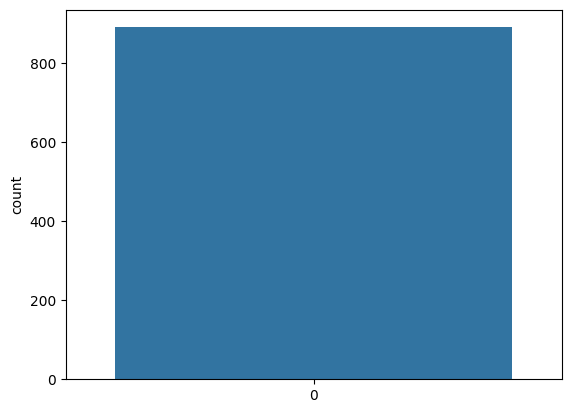

In [23]:
# Univariate Analysis
# lets start with the survival col
sns.countplot(df['survived'])
death_percent=round((df['survived'].value_counts().values[0]/891)*100)
print('Out of 891 {} people died in the accident'.format(death_percent))

55.106621773288445


<AxesSubplot:ylabel='count'>

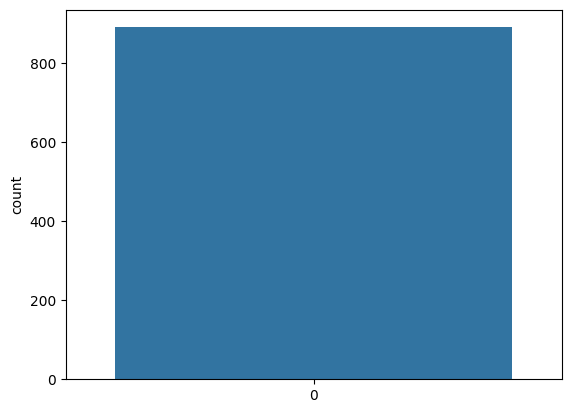

In [24]:
# pclass col
print((df['pclass'].value_counts().values[0]/891)*100)

sns.countplot(df['pclass'])



In [27]:
print((df['sex'].value_counts()/891)*100)

male      64.758698
female    35.241302
Name: sex, dtype: float64


In [28]:
print((df['parch'].value_counts()/891)*100)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: parch, dtype: float64


In [31]:
print((df['embarked'].value_counts()/891)*100)

S    72.502806
C    18.855219
Q     8.641975
Name: embarked, dtype: float64


c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


0.45956263424701577
0.9865867453652877


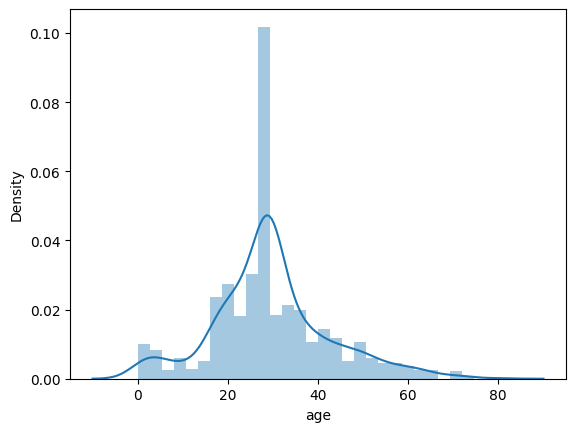

In [34]:
# age column
sns.distplot(df['age'])
print(df['age'].skew())
print(df['age'].kurt())

<AxesSubplot:>

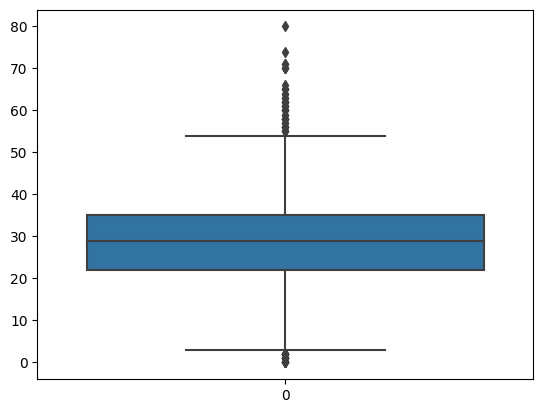

In [35]:
sns.boxplot(df['age'])

In [37]:
# just out of curosity
print('people with age in between 60 and 70 are', df[(df['age']>60) & (df['age']<70)].shape[0])
print('people with age greater than 70 and 75 are', df[(df['age']>=70) & (df['age']<=75)].shape[0])
print('people with age greater than 75 are', df[(df['age']>75)].shape[0])

people with age in between 60 and 70 are 15
people with age greater than 70 and 75 are 6
people with age greater than 75 are 1


In [38]:
# Conclusion : - 
# 1. For all practices purposes age can be considered as normal 
#    distribution.

# 2. Deeper analysis is required for outlier datection

c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


4.787316519674893
33.39814088089868


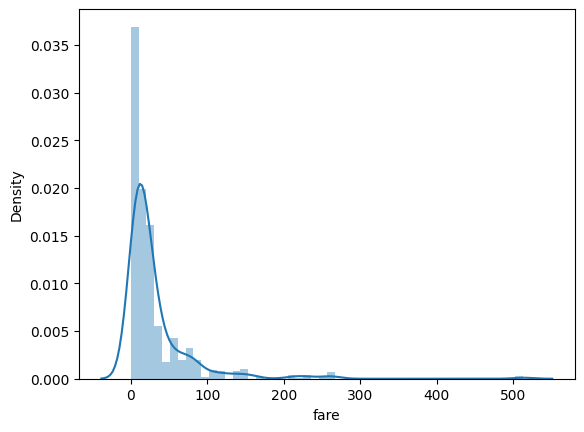

In [40]:
# fare col
sns.distplot(df['fare'])
print(df['fare'].skew())
print(df['fare'].kurt())

In [41]:
# As we can see it  not normal, it is rightly skewed, which means, there 
# is a large amt. of people who bought cheaper tickets.

c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.githu

<AxesSubplot:xlabel='age', ylabel='Density'>

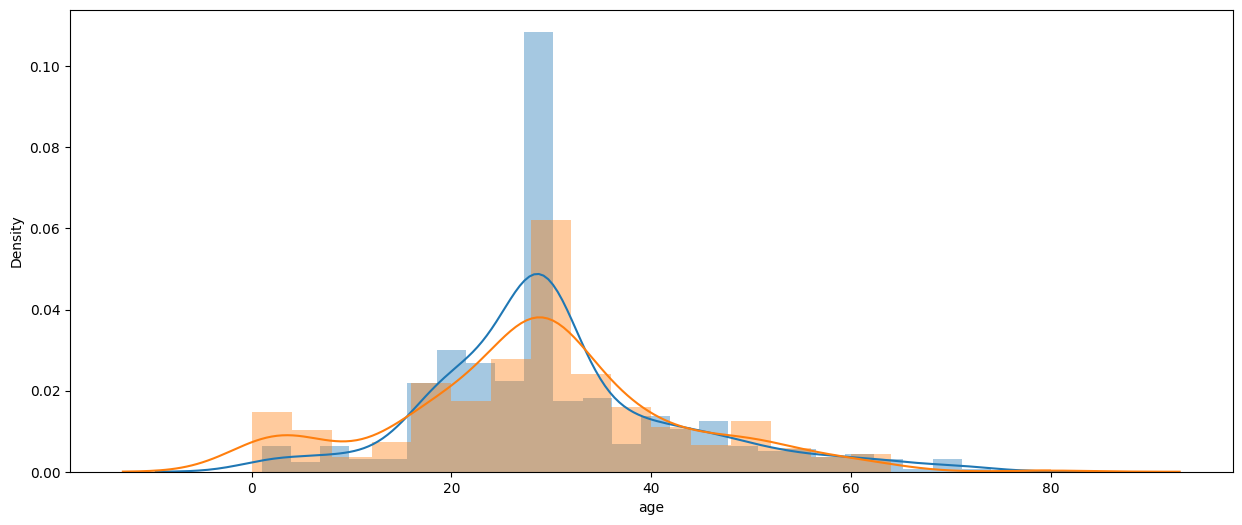

In [48]:
# Multivariate analysis

# survival with age
plt.figure(figsize=(15,6))
sns.distplot(df[df['survived']==0]['age'])
sns.distplot(df[df['survived']==1]['age'])

c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.githu

<AxesSubplot:xlabel='fare', ylabel='Density'>

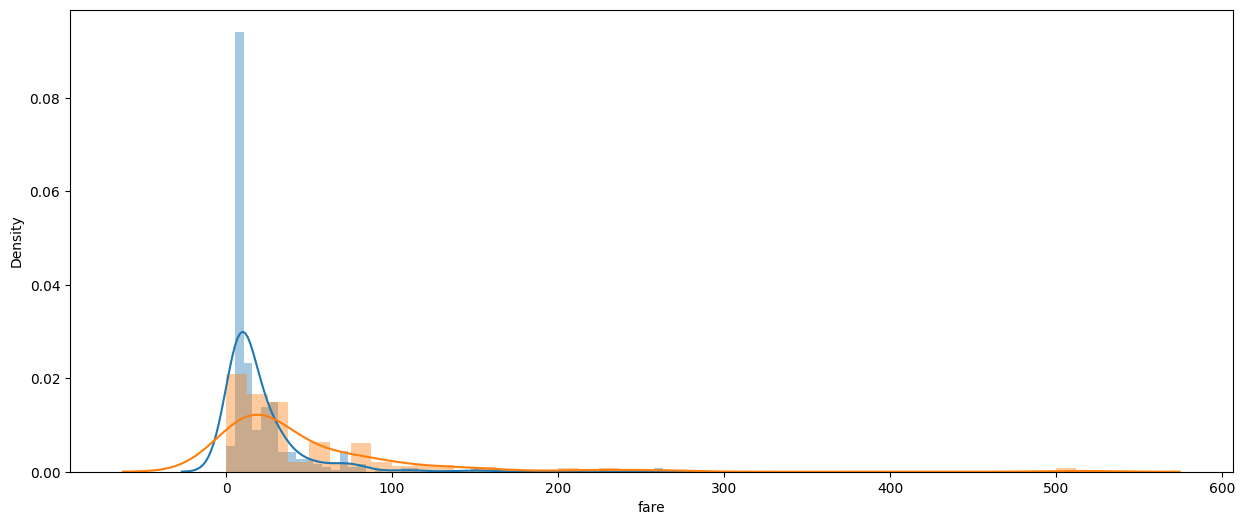

In [49]:
# survival with fare
plt.figure(figsize=(15,6))
sns.distplot(df[df['survived']==0]['fare'])
sns.distplot(df[df['survived']==1]['fare'])

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


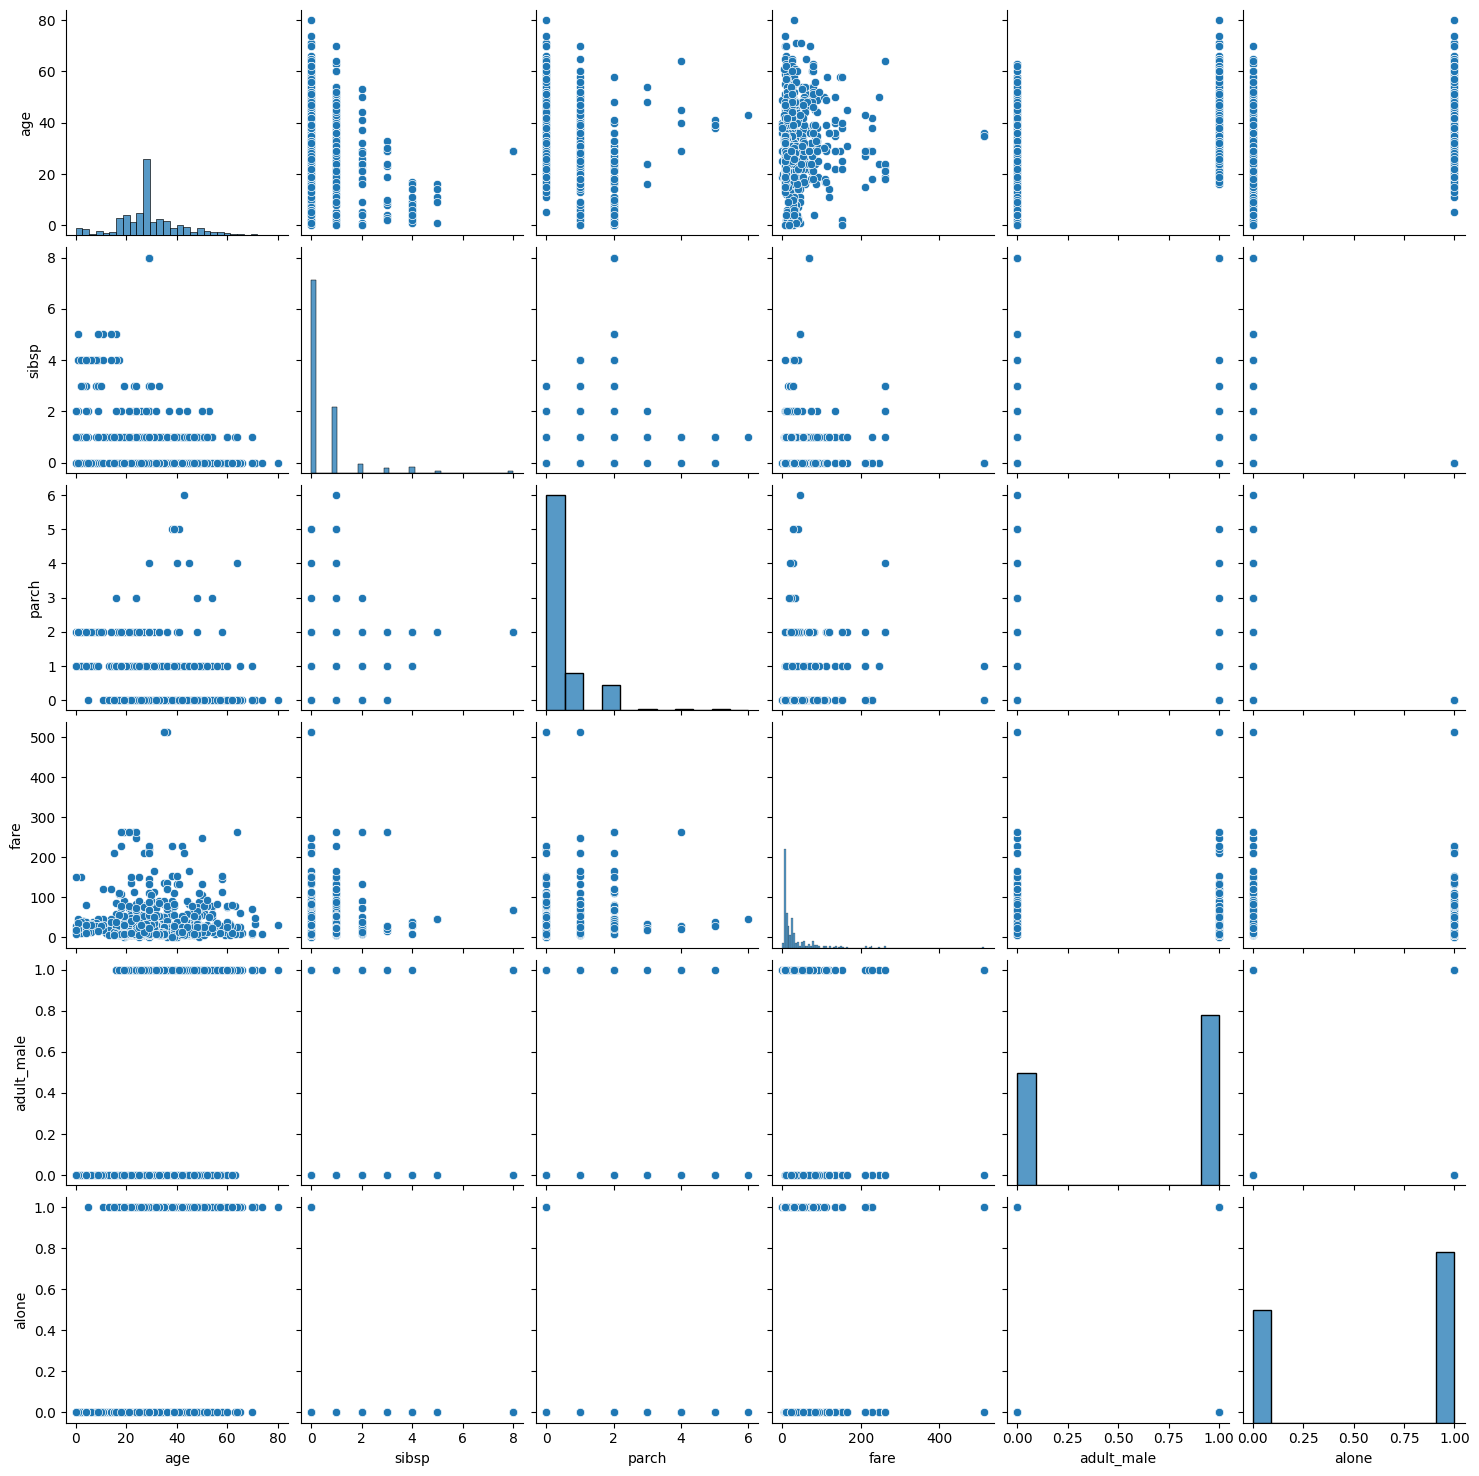

In [50]:
sns.pairplot(df)

<AxesSubplot:>

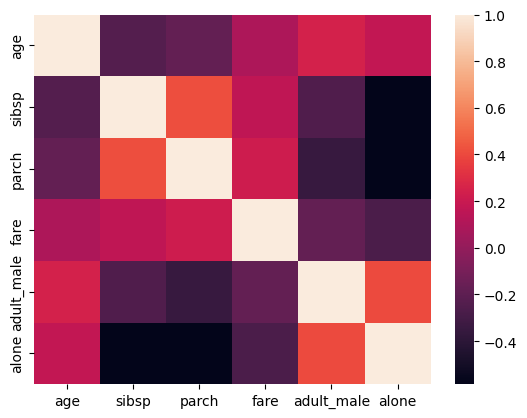

In [51]:
sns.heatmap(df.corr())

In [52]:
# Detecting Outliers:-

# 1.  Numerical data

   # 1. if the data is following normal distribution, anything beyond
   #   3SD * mean + 3SD can be considered as an outlier

   # 2. if the data does not follow normal ditribution using boxplot we can
   #    eliminate points beyond Q1 - 1.15 IQR and Q3 + 1.5 IQR

# 2.Categorical data

   # 3. if the col s highly imbalanced for eg. male 10000 and female 2 then
   #    we can eliminate female

In [53]:
# handling outliers in age (almost normal)
df = df[df['age']<(df['age'].mean() + 3 * df['age'].std())]
df.shape

(884, 15)

In [55]:
# handlng outliers from fare column

# finding quartiles

Q1 = np.percentile(df['fare'],25)
Q3 = np.percentile(df['fare'],75)

outlier_low= Q1 - 1.5 * (Q3 - Q1)
outlier_high= Q3 - 1.5 + (Q3 - Q1)

df = df[(df['fare']>outlier_low) & (df['fare']<outlier_high)]

In [57]:
# One Hot Encoding
df.sample(4)

# cols to be transformed are pclass, sex, embarked, family_type
pd.get_dummies(data=df, columns=['pclass','sex', 'embarked'], drop_first=True)

,survived,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
0,0,22,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0,1,1,0,1
2,1,26,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,1,0,0,1
4,0,35,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,1,1,0,1
5,0,29,0,0,8.4583,Third,man,True,NaN,Queenstown,no,True,0,1,1,1,0
6,0,54,0,0,51.8625,First,man,True,E,Southampton,no,True,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,1,0,1,0,1
887,1,19,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0,0,0,0,1
888,0,29,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,0,1,0,0,1
889,1,26,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,0,0,1,0,0


In [58]:
df = pd.get_dummies(data=df, columns=['pclass','sex', 'embarked'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
0,0,22,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0,1,1,0,1
2,1,26,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,1,0,0,1
4,0,35,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,1,1,0,1
5,0,29,0,0,8.4583,Third,man,True,NaN,Queenstown,no,True,0,1,1,1,0
6,0,54,0,0,51.8625,First,man,True,E,Southampton,no,True,0,0,1,0,1


<AxesSubplot:>

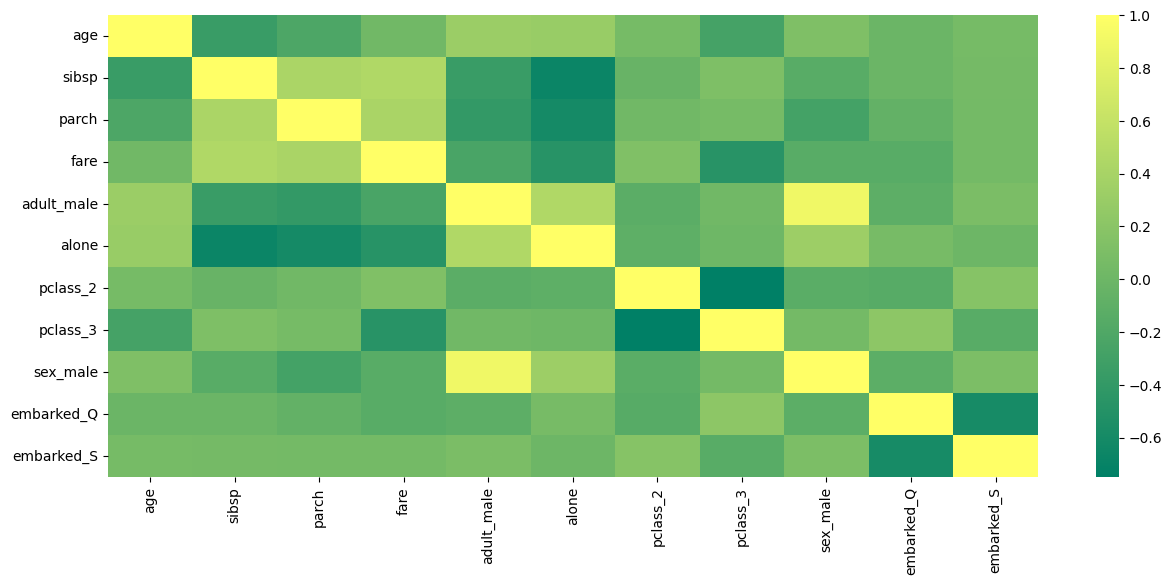

In [59]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')